In [1]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Abalone dataset
df = pd.read_csv('abalone_train.csv')

# Load the test dataset
test_df = pd.read_csv('abalone_test.csv')

In [3]:
# Observe the dataset
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
# Check for NAs
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
# Data observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole_weight    90615 non-null  float64
 6   Shucked_weight  90615 non-null  float64
 7   Viscera_weight  90615 non-null  float64
 8   Shell_weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
# Fit a regression model
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]
y = df['Rings']

### Model One

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Assumptions Check for Model 1 - Fitted values and residuals
y_train_pred = model.predict(X_train)
residuals1 = y_train - y_train_pred

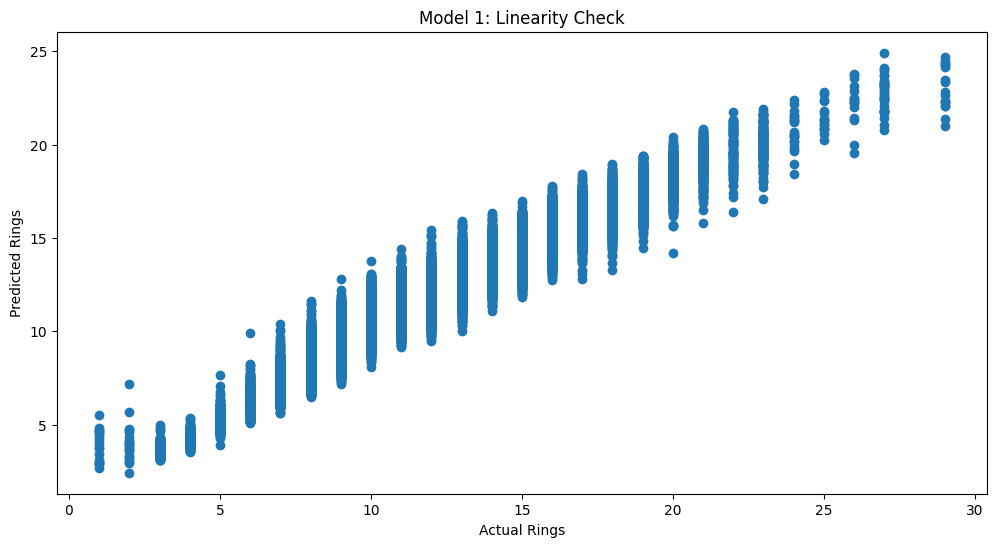

In [10]:
# Investigate regression assumptions - Linearity
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Model 1: Linearity Check')
plt.show()

In [11]:
# Independence of errors - Durbin-Watson statistic
dw_stat1 = sm.stats.durbin_watson(residuals1)
print("Durbin-Watson statistic for Model 1:", dw_stat1)

Durbin-Watson statistic for Model 1: 1.995741705840391


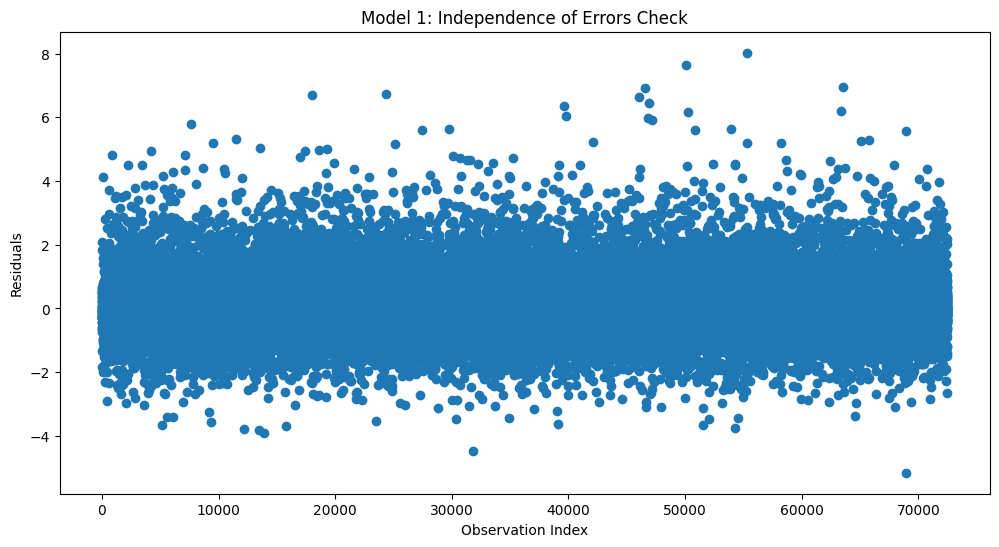

In [12]:
# Independence of errors Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), residuals1)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Model 1: Independence of Errors Check')
plt.show()

In [13]:
# Collinearity Check - Variance Inflation Factor
vif_data_model1 = pd.DataFrame()
vif_data_model1["Feature"] = X_train.columns
vif_data_model1["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF for Model 1:", vif_data_model1)

VIF for Model 1:           Feature         VIF
0          Length  895.831782
1        Diameter  959.988285
2          Height   99.990913
3    Whole_weight  271.722902
4  Shucked_weight   80.573934
5  Viscera_weight   75.887621
6    Shell_weight   71.367188


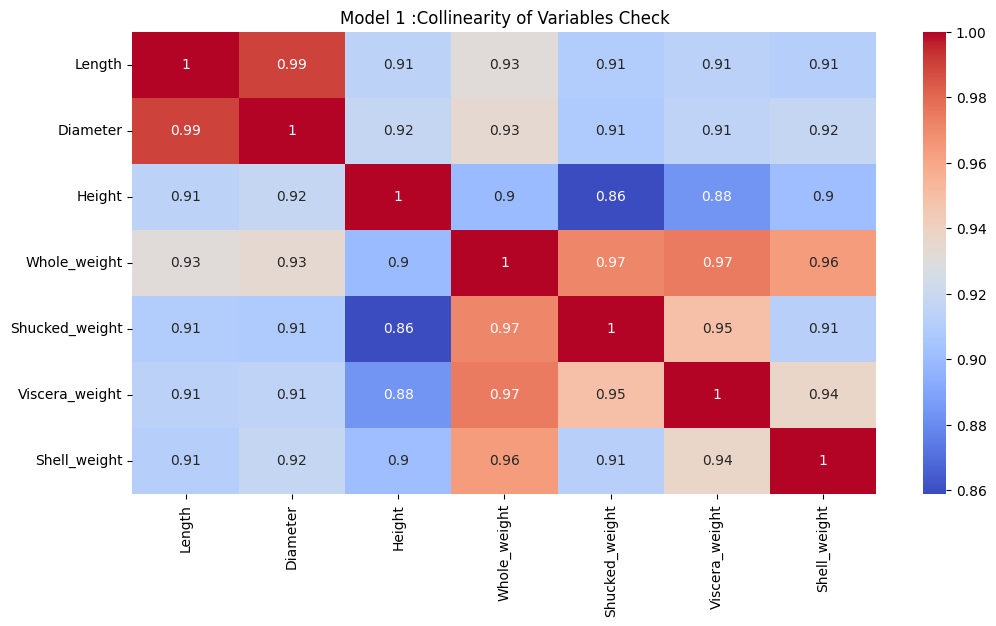

In [14]:
# Collinearity of variables - Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Model 1 :Collinearity of Variables Check')
plt.show()

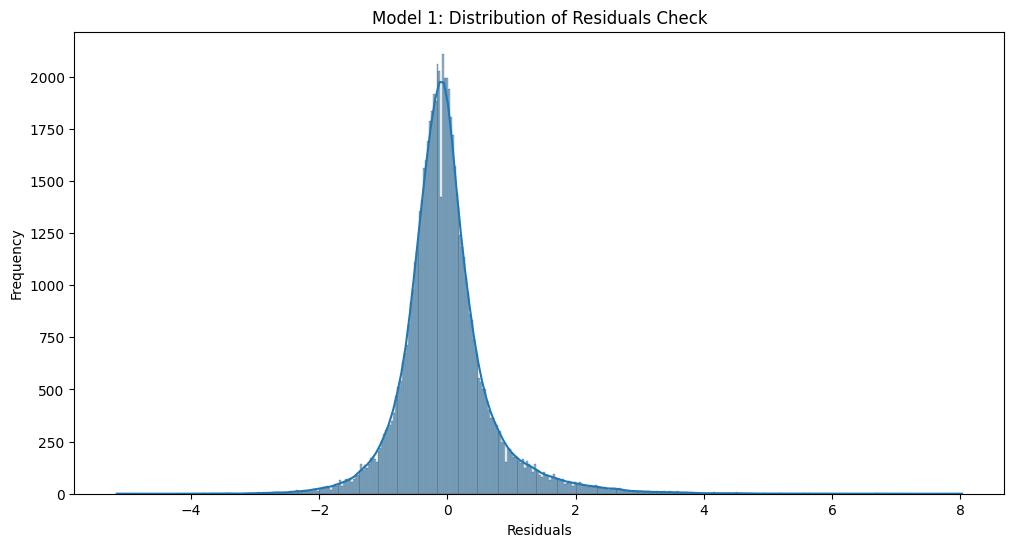

In [15]:
# 4. Distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Model 1: Distribution of Residuals Check')
plt.show()

### Model Two

In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [17]:
# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [18]:
# Assumptions Check for Model 2 - Fitted values and residuals
y_train_pred2 = model2.predict(X_train)
residuals2 = y_train - y_train_pred2

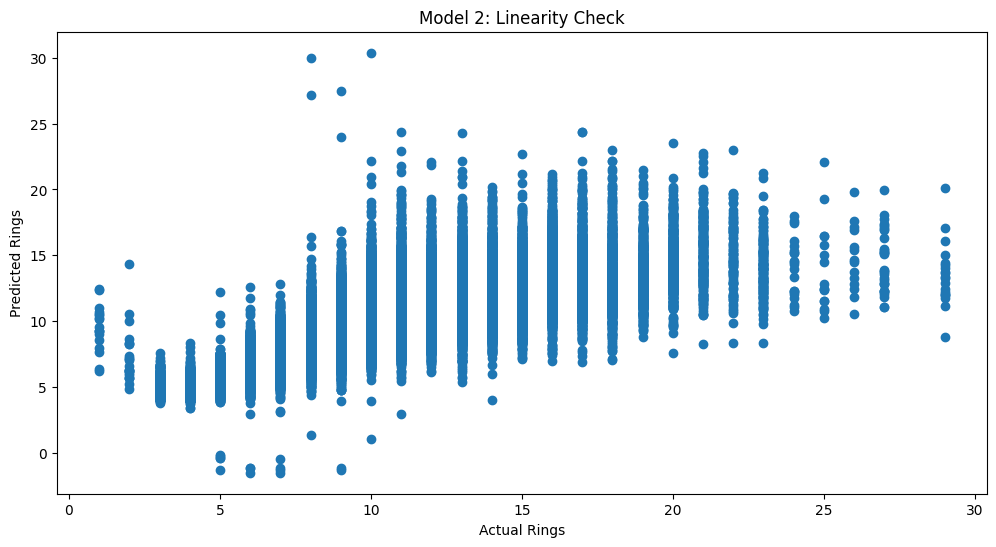

In [19]:
# Investigate regression assumptions - Linearity
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Model 2: Linearity Check')
plt.show()

In [20]:
# Independence of errors - Durbin-Watson statistic
dw_stat2 = sm.stats.durbin_watson(residuals2)
print("Durbin-Watson statistic for Model 2:", dw_stat2)

Durbin-Watson statistic for Model 2: 1.9906073034626617


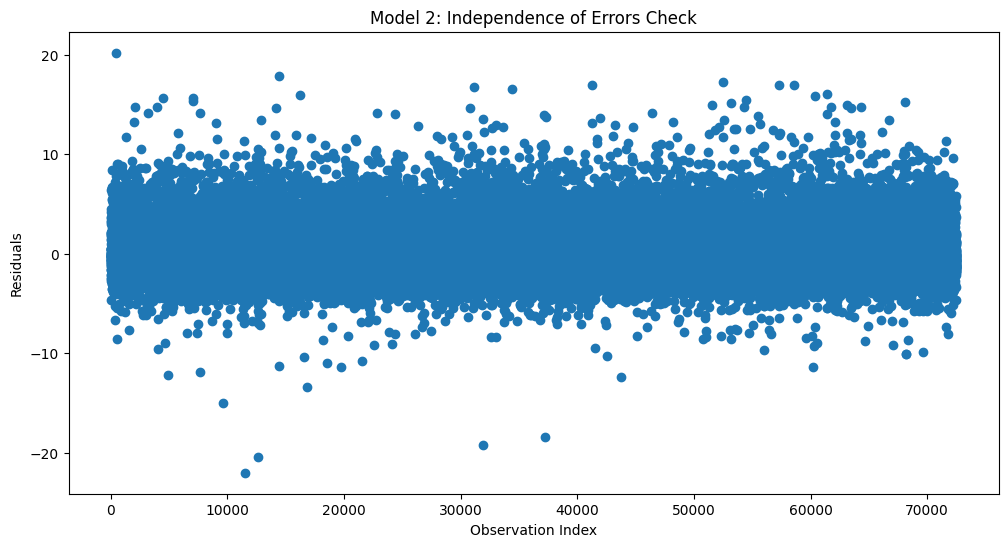

In [21]:
# Visualize Independence of errors
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), residuals2)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Model 2: Independence of Errors Check')
plt.show()

In [22]:
# Collinearity Check - Variance Inflation Factor
vif_data_model2 = pd.DataFrame()
vif_data_model2["Feature"] = X_train.columns
vif_data_model2["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF for Model 2:", vif_data_model2)

VIF for Model 2:           Feature         VIF
0          Length  889.314650
1        Diameter  951.640283
2          Height   98.758050
3    Whole_weight  269.349611
4  Shucked_weight   79.543748
5  Viscera_weight   75.910000
6    Shell_weight   71.021459


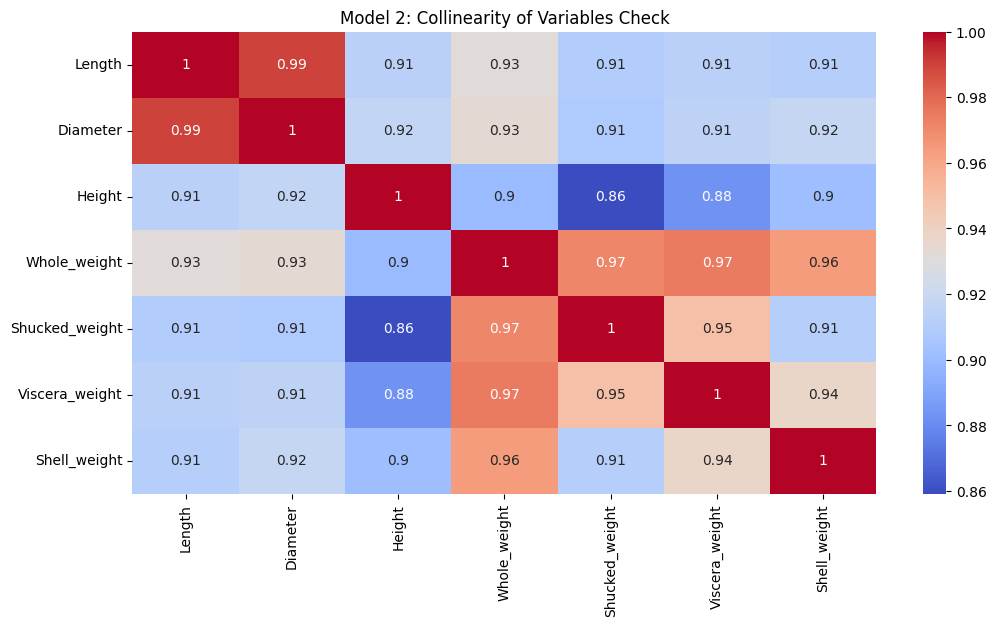

In [23]:
# Visualize Collinearity of variables
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Model 2: Collinearity of Variables Check')
plt.show()

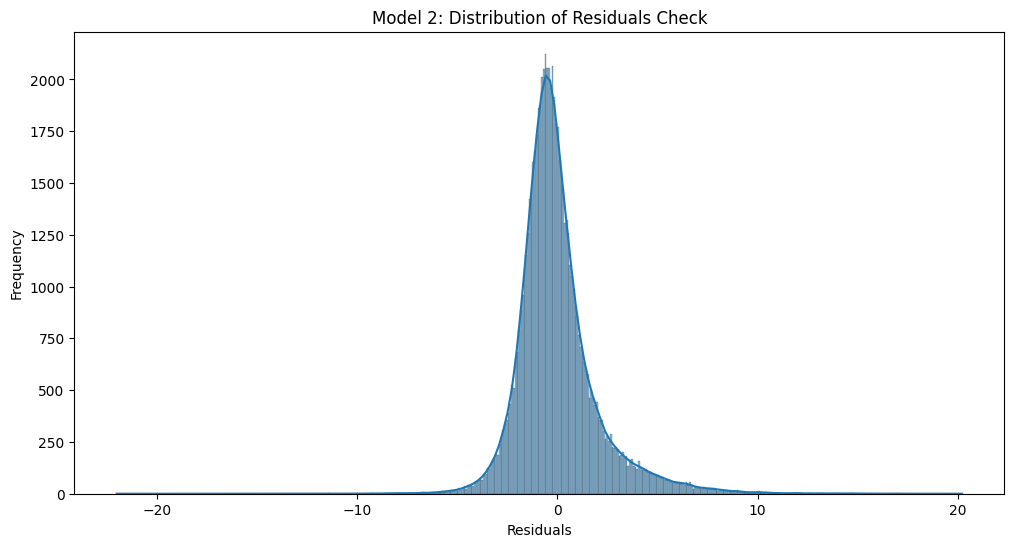

In [24]:
# Visualizing Distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Model 2: Distribution of Residuals Check')
plt.show()

### Predictions

In [25]:
# Make predictions on the test dataset
X_test = test_df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

In [26]:
# Generate predictions for both models
y_pred_model1 = model.predict(X_test)
y_pred_model2 = model2.predict(X_test)

In [27]:
# Print feature importance for Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})
print("\nRandom Forest Feature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))


Random Forest Feature Importance:
          Feature  Importance
6    Shell_weight    0.580938
4  Shucked_weight    0.146786
3    Whole_weight    0.080357
5  Viscera_weight    0.067911
0          Length    0.043755
2          Height    0.041278
1        Diameter    0.038976


### Output File

In [28]:
# Model 1 predictions - Rounding since rings should be integers
output_model1 = pd.DataFrame({
    'id': test_df['id'],
    'Rings': np.round(y_pred_model1) 
})
output_model1.to_csv('model1_submisions.csv', index=False)
print("\nSample of Model 1 predictions:")
print(output_model1.head())


Sample of Model 1 predictions:
      id  Rings
0  90615   10.0
1  90616   10.0
2  90617   10.0
3  90618   11.0
4  90619    8.0


In [29]:
# Model 2 predictions - Rounding since rings should be integers
output_model2 = pd.DataFrame({
    'id': test_df['id'],
    'Rings': np.round(y_pred_model2)  
})
output_model2.to_csv('model2_submissions.csv', index=False)
print("\nSample of Model 2 predictions:")
print(output_model2.head())


Sample of Model 2 predictions:
      id  Rings
0  90615    8.0
1  90616   10.0
2  90617   10.0
3  90618   11.0
4  90619    8.0
